In [1]:
import numpy as np
import pandas as pd
import random
import pickle

from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Обзор данных


### Описание датасета:

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный скоринг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)


 **Кредитный скоринг:**
 
выше 790 — «великолепно»

750—790 — средний стандартный уровень

740—750 — «очень хорошо»

720—740 — «хорошо»

700—720 — «плохо»

ниже 700 — «очень плохо»

### Пути к директориям и файлам 

In [2]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

### Загрузка данных

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


In [4]:
train_df.shape

(7500, 17)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Annual Income

Years in current job

Months since last delinquent

Bankruptcies

Credit Score

Заполнены с пропусками

In [6]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
5,Home Mortgage,922583.0,5 years,0.0,26.0,17.5,713174.0,0.0,41.0,0.0,debt consolidation,Short Term,94028.0,135508.0,11148.0,679.0
6,Home Mortgage,1233309.0,3 years,0.0,7.0,22.0,376420.0,0.0,43.0,0.0,home improvements,Short Term,454388.0,292904.0,8181.0,685.0
7,Rent,1215867.0,3 years,0.0,13.0,12.2,195888.0,0.0,19.0,0.0,debt consolidation,Short Term,407726.0,120099.0,7599.0,701.0
8,Rent,NaN,5 years,0.0,8.0,9.1,370524.0,0.0,NaN,0.0,major purchase,Short Term,131956.0,237747.0,10112.0,NaN
9,Home Mortgage,2140445.0,10+ years,1.0,15.0,16.7,867680.0,1.0,9.0,0.0,debt consolidation,Short Term,391336.0,294500.0,18372.0,745.0


In [8]:
test_df.shape

(2500, 16)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Annual Income

Years in current job

Months since last delinquent

Bankruptcies

Credit Score

Заполнены с пропусками

### Уменьшение объема памяти  

In [10]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [11]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.38 MB
Decreased by 60.9%


In [12]:
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 0.31 MB
Memory usage after optimization is: 0.13 MB
Decreased by 58.9%


In [13]:
train_df.dtypes

Home Ownership                  category
Annual Income                    float32
Years in current job            category
Tax Liens                        float32
Number of Open Accounts          float32
Years of Credit History          float32
Maximum Open Credit              float32
Number of Credit Problems        float32
Months since last delinquent     float32
Bankruptcies                     float32
Purpose                         category
Term                            category
Current Loan Amount              float32
Current Credit Balance           float32
Monthly Debt                     float32
Credit Score                     float32
Credit Default                      int8
dtype: object

In [14]:
test_df.dtypes

Home Ownership                  category
Annual Income                    float32
Years in current job            category
Tax Liens                        float32
Number of Open Accounts          float32
Years of Credit History          float32
Maximum Open Credit              float32
Number of Credit Problems        float32
Months since last delinquent     float32
Bankruptcies                     float32
Purpose                         category
Term                            category
Current Loan Amount              float32
Current Credit Balance           float32
Monthly Debt                     float32
Credit Score                     float32
dtype: object

### Обзор целевой переменной

In [15]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [16]:
def Percentage_Distribution_Of_Values(df, value_name, result_name):
    """
    # Задача функции: - получить процент распределения значений конкретного показателя по целевым значениям.

    # Parameters:
    1) df - исходный датасет.
    2) value_name - название показателя (столбца) в котором будут находится значения показателя.
    3) result_name - название показателя (столбца) в котором находятся целевые значения.

    # Returns
    Возвращается DataFrame

    """
    
    df_tmp = df.loc[:,[value_name, result_name]]
    df_tmp.insert(2, 'Percent', 1)
    df_tmp = df_tmp.groupby([value_name, result_name]).sum()
    df_tmp = df_tmp.unstack(level = result_name)
    df_tmp.insert(2, 'Quantity', 0)
    df_tmp = df_tmp.fillna(0) # Могут появиться, т.к. вполне вернятно, что каких-то вариантов значений вообще не будет.
    df_tmp['Quantity'] = df_tmp['Percent', 0] + df_tmp['Percent', 1]
    df_tmp['Percent', 0] = df_tmp['Percent', 0] / df_tmp['Quantity']
    df_tmp['Percent', 1] = df_tmp['Percent', 1] / df_tmp['Quantity']

    return df_tmp

In [17]:
total_df = train_df.loc[:,['Credit Default']]
total_df.insert(0, 'Total', 'Total')
total_df = Percentage_Distribution_Of_Values (total_df, 'Total', 'Credit Default')
total_df

Percent           Quantity
Credit Default         0         1         
Total                                      
Total           0.718267  0.281733     7500

### Обзор количественных признаков

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                7500 non-null   category
 1   Annual Income                 5943 non-null   float32 
 2   Years in current job          7129 non-null   category
 3   Tax Liens                     7500 non-null   float32 
 4   Number of Open Accounts       7500 non-null   float32 
 5   Years of Credit History       7500 non-null   float32 
 6   Maximum Open Credit           7500 non-null   float32 
 7   Number of Credit Problems     7500 non-null   float32 
 8   Months since last delinquent  3419 non-null   float32 
 9   Bankruptcies                  7486 non-null   float32 
 10  Purpose                       7500 non-null   category
 11  Term                          7500 non-null   category
 12  Current Loan Amount           7500 non-null   fl

In [19]:
df_num_features = train_df.select_dtypes(include=['int32', 'float32', 'float16', 'int8', 'int16'])
df_num_features.drop('Credit Default', axis=1, inplace=True)

/Users/olashaikova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df_num_features

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,482087.0,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,100000000.0,47386.0,7914.0,749.0
1,1025487.0,0.0,15.0,15.300000,1181730.0,0.0,NaN,0.0,264968.0,394972.0,18373.0,737.0
2,751412.0,0.0,11.0,35.000000,1182434.0,0.0,NaN,0.0,100000000.0,308389.0,13651.0,742.0
3,805068.0,0.0,8.0,22.500000,147400.0,1.0,NaN,1.0,121396.0,95855.0,11338.0,694.0
4,776264.0,0.0,13.0,13.600000,385836.0,1.0,NaN,0.0,125840.0,93309.0,7180.0,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,0.0,3.0,8.500000,107866.0,0.0,NaN,0.0,129360.0,73492.0,1900.0,697.0
7496,1533984.0,0.0,10.0,26.500000,686312.0,0.0,43.0,0.0,444048.0,456399.0,12783.0,7410.0
7497,1878910.0,0.0,12.0,32.099998,1778920.0,0.0,NaN,0.0,100000000.0,477812.0,12479.0,748.0
7498,NaN,0.0,21.0,26.500000,1141250.0,0.0,NaN,0.0,615274.0,476064.0,37118.0,NaN


In [21]:
df_num_features.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.0000,3419.000000,7486.000000,7500.0,7.500000e+03,7500.000000,5943.000000
mean,1.366390e+06,0.030133,11.130934,18.317446,9.451526e+05,0.1700,34.692600,0.117152,11873135.0,2.898332e+05,18314.453125,1151.087524
std,8.453384e+05,0.271613,4.908937,7.041938,1.602614e+07,0.4986,21.688801,0.347197,31926302.0,3.178713e+05,11926.758789,1604.447510
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.0000,0.000000,0.000000,11242.0,0.000000e+00,0.000000,585.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.0000,16.000000,0.000000,180169.0,1.142565e+05,10067.500000,711.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.0000,32.000000,0.000000,309573.0,2.093230e+05,16076.500000,731.000000
75%,1.640137e+06,0.000000,14.000000,21.799999,7.935015e+05,0.0000,50.000000,0.000000,519882.0,3.604062e+05,23818.000000,743.000000
max,1.014934e+07,7.000000,43.000000,57.700001,1.304726e+09,7.0000,118.000000,4.000000,100000000.0,6.506797e+06,136679.000000,7510.000000


#### Показатель 'Home Ownership'
(домовладение)

Без пропусков в обоих датасетах

In [22]:
ho_df = pd.concat([train_df['Home Ownership'].value_counts(), test_df['Home Ownership'].value_counts()], axis=1).reset_index()
ho_df.columns = ['value', 'train', 'test']
ho_df.append(['', train_df['Home Ownership'].value_counts().dtype, test_df['Home Ownership'].value_counts().dtype],['value', 'train', 'test'])
ho_df

,value,train,test
0,Home Mortgage,3637,1225
1,Rent,3204,1020
2,Own Home,647,248
3,Have Mortgage,12,7


In [23]:
ho_df = Percentage_Distribution_Of_Values(train_df, 'Home Ownership', 'Credit Default')
ho_df

Percent           Quantity
Credit Default         0         1         
Home Ownership                             
Have Mortgage   0.833333  0.166667       12
Home Mortgage   0.748144  0.251856     3637
Own Home        0.703246  0.296754      647
Rent            0.686954  0.313046     3204

Own Home - Собственный дом.

Home Mortgage - Ипотека на жилье.

Rent - Арендованное жтлье.

Have Mortgage - Есть ипотека.

Have Mortgage и Home Mortgage разница не понятно, для уменьшения статистически незначимых значений, объединим их


In [24]:
train_df.loc[train_df['Home Ownership'] == 'Have Mortgage', ['Home Ownership']] = 'Home Mortgage'
test_df.loc[test_df['Home Ownership'] == 'Have Mortgage', ['Home Ownership']] = 'Home Mortgage'

#### Показатель 'Tax Liens'
 (налоговые обременения)
 
Без пропусков в обоих датасетах

In [25]:
train_df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [26]:
test_df['Tax Liens'].value_counts()

0.0     2445
1.0       45
2.0        5
15.0       1
6.0        1
5.0        1
3.0        1
4.0        1
Name: Tax Liens, dtype: int64

In [27]:
tl_df = Percentage_Distribution_Of_Values(train_df, 'Tax Liens', 'Credit Default')
tl_df

Percent           Quantity
Credit Default         0         1         
Tax Liens                                  
0.0             0.719658  0.280342   7366.0
1.0             0.710843  0.289157     83.0
2.0             0.500000  0.500000     30.0
3.0             0.500000  0.500000     10.0
4.0             0.500000  0.500000      6.0
5.0             0.500000  0.500000      2.0
6.0             1.000000  0.000000      2.0
7.0             1.000000  0.000000      1.0

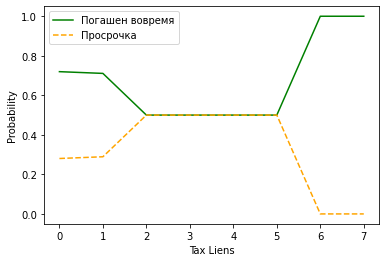

In [28]:
x = tl_df.index.to_numpy()
y1 = tl_df['Percent', 0].to_numpy()
y2 = tl_df['Percent', 1].to_numpy()

plt.plot(x, y1, label='Погашен вовремя', color='green')
plt.plot(x, y2, label='Просрочка', color='orange', linestyle='dashed')

plt.xlabel("Tax Liens")
plt.ylabel("Probability")

plt.legend()

plt.show()

При налоговом обременении: 

* менее 2 - 28-29%, 
 
* 2-5 вероятность просрочки 50%,

* более 5 - 0%

Можно объединить в 4 группы: 
* 0 - 0

* 1 - 1 
 
* 2 - 2-5 

* 3 - 6 и более


In [29]:
train_df.loc[(train_df['Tax Liens'] > 1) & (train_df['Tax Liens'] < 6), ['Tax Liens']] = 2
test_df.loc[(test_df['Tax Liens'] > 1) & (test_df['Tax Liens'] < 6), ['Tax Liens']] = 2

train_df.loc[train_df['Tax Liens'] > 5, ['Tax Liens']] = 3
test_df.loc[test_df['Tax Liens'] > 5, ['Tax Liens']] = 3

#### Показатель 'Number of Open Accounts'
(количество открытых счетов)

Без пропусков в обоих датасетах

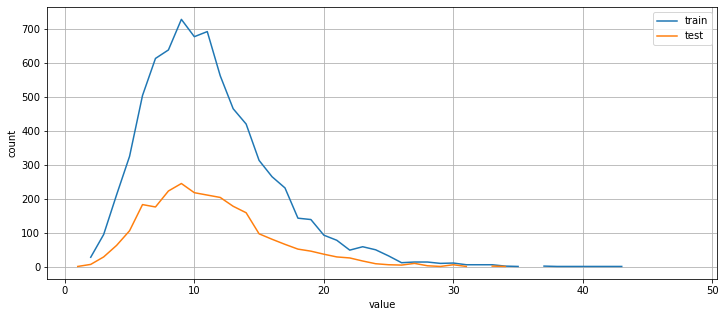

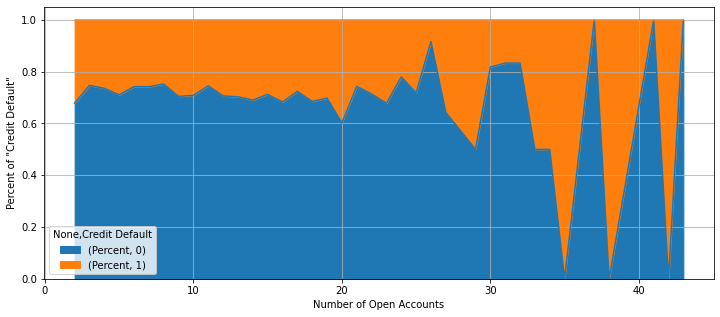

In [30]:
noa_df = pd.concat([train_df['Number of Open Accounts'].value_counts(), test_df['Number of Open Accounts'].value_counts()], axis=1).reset_index()
noa_df.columns = ['value', 'train', 'test']
noa_df.plot(x='value', y=['train','test'], kind='line', ylabel = 'count', figsize=(12,5), grid = True)

noa_df_tv = Percentage_Distribution_Of_Values(train_df, 'Number of Open Accounts', 'Credit Default')
noa_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12,5), grid = True)

plt.show()

Из графика: основные значения 3-25.

Для этих значений процент просрочки составляет примерно 30%

#### Показатель 'Years of Credit History'
(количество лет кредитной истории)

Без пропусков в обоих датасетах

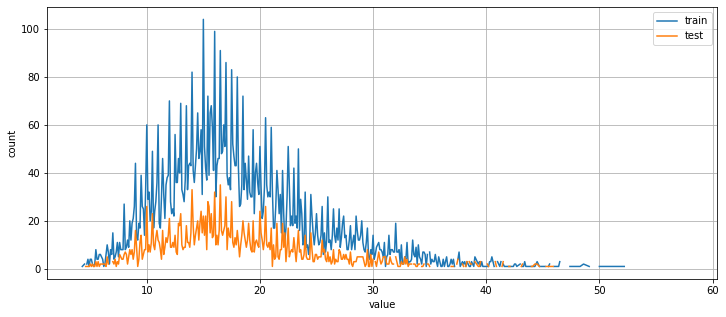

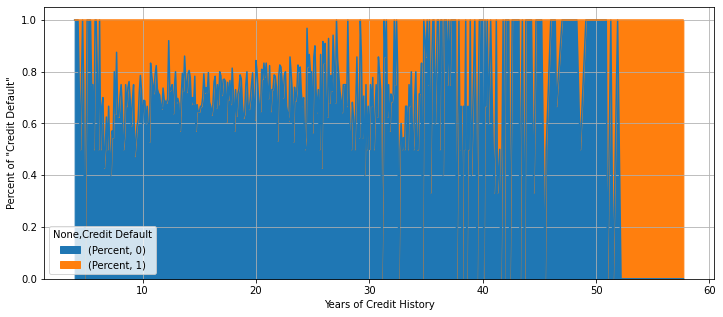

In [31]:
ych_df = pd.concat([train_df['Years of Credit History'].value_counts(), test_df['Years of Credit History'].value_counts()], axis=1).reset_index()
ych_df.columns = ['value', 'train', 'test']
ych_df.plot(x='value', y=['train','test'], kind='line', ylabel = 'count', figsize=(12,5), grid = True)

ych_df_tv = Percentage_Distribution_Of_Values(train_df, 'Years of Credit History', 'Credit Default')
ych_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12,5), grid = True)

plt.show()

Из графика: основные значения 7-35.

Для этих значений процент просрочки составляет примерно 30%

#### Показатель 'Maximum Open Credit'
(наибольший открытый кредит)

Без пропусков в обоих датасетах

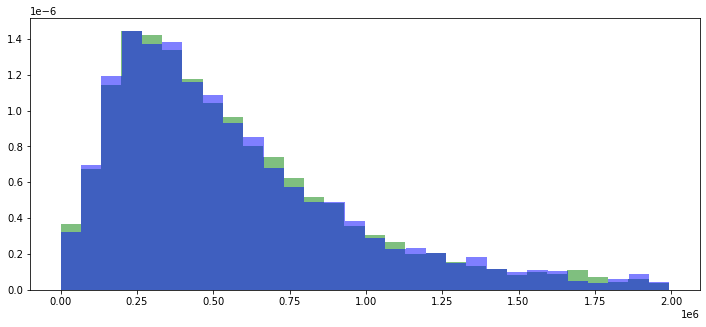

In [32]:
plt.figure(figsize=(12, 5))
moc_lim_train = train_df.loc[train_df['Maximum Open Credit'] < 2000000, ['Maximum Open Credit' , 'Credit Default' ]]
moc_lim_test = test_df.loc[test_df['Maximum Open Credit'] < 2000000, ['Maximum Open Credit']]

plt.hist(moc_lim_train['Maximum Open Credit'], bins=30, density=True, alpha=0.5, label='train', color='green')
plt.hist(moc_lim_test['Maximum Open Credit'], bins=30, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Maximum Open Credit', ylabel='Percent of "Credit Default"'>

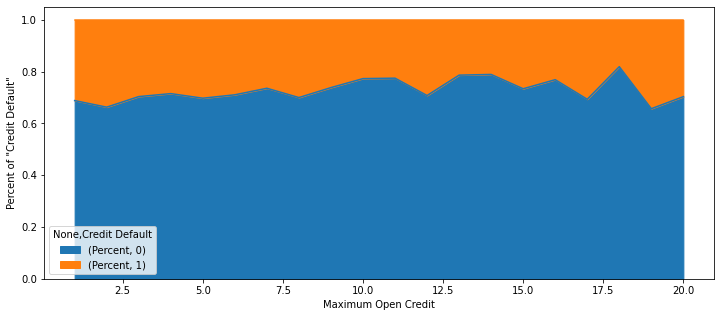

In [33]:
moc_df = moc_lim_train
moc_df['Maximum Open Credit'] = moc_df['Maximum Open Credit'] // 100000 + 1

moc_df_tv = Percentage_Distribution_Of_Values(moc_df, 'Maximum Open Credit', 'Credit Default')
moc_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12, 5))

Среди основных значений просрочек по кредиту около 30%

#### Показатель 'Number of Credit Problems'
(количество проблем с кредитом)

Без пропусков в обоих датасетах

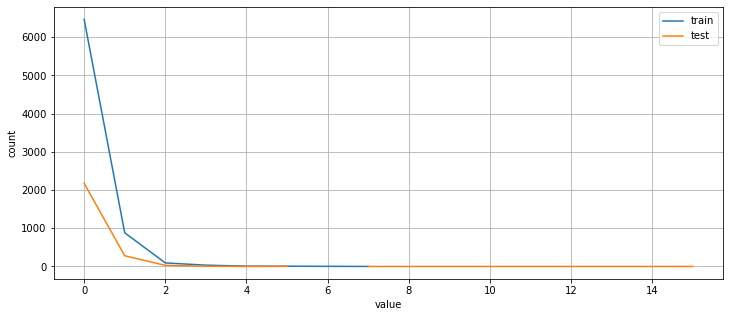

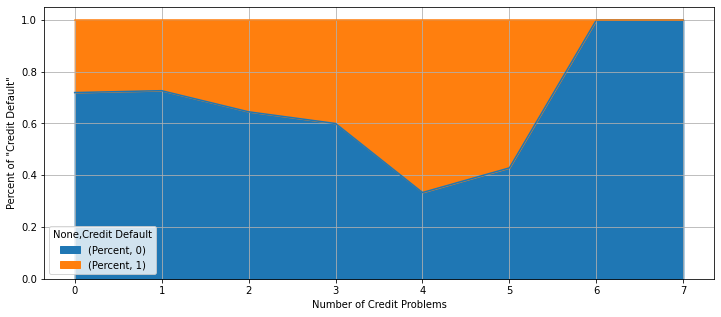

In [34]:
ncp_df = pd.concat([train_df['Number of Credit Problems'].value_counts(), test_df['Number of Credit Problems'].value_counts()], axis=1).reset_index()
ncp_df.columns = ['value', 'train', 'test']
ncp_df.plot(x='value', y=['train','test'], kind='line', ylabel = 'count', figsize=(12,5), grid = True)

ncp_df_tv = Percentage_Distribution_Of_Values(train_df, 'Number of Credit Problems', 'Credit Default')
ncp_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12,5), grid = True)

plt.show()

Максимальное значение 7, нужно просмотреть данные строки для выясения выброс ли это 

In [35]:
train_df.loc[train_df['Number of Credit Problems'] > 4].tail(20)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1129,Rent,1691019.0,5 years,2.0,11.0,20.400000,681934.0,6.0,71.0,2.0,major purchase,Long Term,543906.0,116014.0,38753.0,693.0,0
1214,Rent,3061584.0,2 years,3.0,14.0,28.900000,949564.0,6.0,67.0,0.0,debt consolidation,Short Term,100000000.0,352640.0,29595.0,740.0,0
2716,Home Mortgage,2522611.0,10+ years,2.0,7.0,14.400000,235994.0,6.0,56.0,1.0,business loan,Short Term,342650.0,110257.0,14610.0,711.0,0
3028,Rent,NaN,NaN,2.0,11.0,25.000000,344102.0,5.0,81.0,1.0,debt consolidation,Short Term,312444.0,230318.0,17334.0,NaN,1
3435,Rent,1231561.0,10+ years,2.0,9.0,16.000000,518892.0,5.0,71.0,0.0,other,Long Term,345708.0,163571.0,17242.0,708.0,1
3572,Own Home,2272761.0,5 years,0.0,12.0,21.500000,178596.0,5.0,31.0,0.0,vacation,Long Term,156288.0,112138.0,27652.0,606.0,0
3814,Rent,1254513.0,1 year,2.0,5.0,10.500000,122804.0,5.0,36.0,0.0,debt consolidation,Short Term,193864.0,31920.0,1965.0,716.0,1
4624,Home Mortgage,NaN,3 years,0.0,9.0,27.000000,228624.0,5.0,8.0,0.0,debt consolidation,Short Term,754446.0,81149.0,17732.0,NaN,1
4774,Own Home,1268896.0,NaN,2.0,15.0,15.800000,3278000.0,5.0,18.0,1.0,debt consolidation,Short Term,268356.0,939892.0,14698.0,739.0,0
5373,Own Home,1711881.0,10+ years,3.0,12.0,15.400000,551166.0,6.0,26.0,0.0,debt consolidation,Short Term,313654.0,295602.0,36092.0,741.0,0


Строка 5969- при достаточно высоком доходе, кредите на 782782 и 7 проблем с кредитом- маловероятно, это скорее всего выброс. Заменим на медиану все значения выше 6.

In [36]:
train_df.loc[train_df['Number of Credit Problems'] > 6 , 'Number of Credit Problems'] = train_df['Number of Credit Problems'].median()

#### Показатель 'Purpose'
(цель кредита)

Без пропусков в обоих датасетах

In [37]:
p_df = pd.concat([train_df['Purpose'].value_counts(), test_df['Purpose'].value_counts()], axis=1).reset_index()
p_df.columns = ['value', 'train', 'test']

p_df

,value,train,test
0,business loan,129,30.0
1,buy a car,96,34.0
2,buy house,34,19.0
3,debt consolidation,5944,1973.0
4,educational expenses,10,3.0
5,home improvements,412,140.0
6,major purchase,40,9.0
7,medical bills,71,27.0
8,moving,11,1.0
9,other,665,240.0


In [38]:
p_df_tv = Percentage_Distribution_Of_Values(train_df, 'Purpose', 'Credit Default')

p_df_tv

Percent           Quantity
Credit Default               0         1         
Purpose                                          
business loan         0.573643  0.426357      129
buy a car             0.750000  0.250000       96
buy house             0.735294  0.264706       34
debt consolidation    0.721736  0.278264     5944
educational expenses  0.900000  0.100000       10
home improvements     0.737864  0.262136      412
major purchase        0.775000  0.225000       40
medical bills         0.690141  0.309859       71
moving                0.818182  0.181818       11
other                 0.703759  0.296241      665
renewable energy      0.000000  1.000000        2
small business        0.461538  0.538462       26
take a trip           0.729730  0.270270       37
vacation              0.750000  0.250000        8
wedding               0.733333  0.266667       15

Из таблиц понятно, что debt consolidation, other и home improvements- основные значения, просрочек по данным показателям около 28%. 

renewable energy в трен датасете 2, можно отнести к home improvements

In [39]:
train_df.loc[train_df['Purpose'] == 'renewable energy', ['Purpose']] = 'home improvements'
test_df.loc[test_df['Purpose'] == 'renewable energy', ['Purpose']] = 'home improvements'

#### Показатель 'Term'
(срок кредита)

Без пропусков в обоих датасетах

In [40]:
t_df = pd.concat([train_df['Term'].value_counts(), test_df['Term'].value_counts()], axis=1).reset_index()
t_df.columns = ['value', 'train', 'test']

t_df

,value,train,test
0,Short Term,5556,1861
1,Long Term,1944,639


In [41]:
t_df_tv = Percentage_Distribution_Of_Values(train_df, 'Term', 'Credit Default')

t_df_tv

Percent           Quantity
Credit Default         0         1         
Term                                       
Long Term       0.580247  0.419753     1944
Short Term      0.766559  0.233441     5556

Вероятность просрочки с увеличением периода выплаты тоже увеличивается. Уоротких кредитов более чем в 2 раза больше, а процент просрочки у коротких составляет 23%, а длинных 42%, немного менее чем в 2 раза.

#### Показатель 'Current Loan Amount'
(текущая сумма кредита)

Без пропусков в обоих датасетах

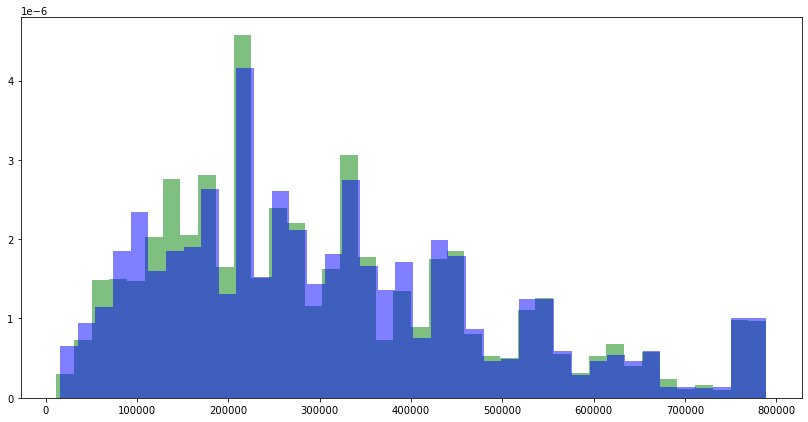

In [42]:
plt.figure(figsize=(14, 7))
cla_lim_train = train_df.loc[train_df['Current Loan Amount'] < 1000000, ['Current Loan Amount' , 'Credit Default' ]]
cla_lim_test = test_df.loc[test_df['Current Loan Amount'] < 1000000, ['Current Loan Amount']]

plt.hist(cla_lim_train['Current Loan Amount'], bins=40, density=True, alpha=0.5, label='train', color='green')
plt.hist(cla_lim_test['Current Loan Amount'], bins=40, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Percent of "Credit Default"'>

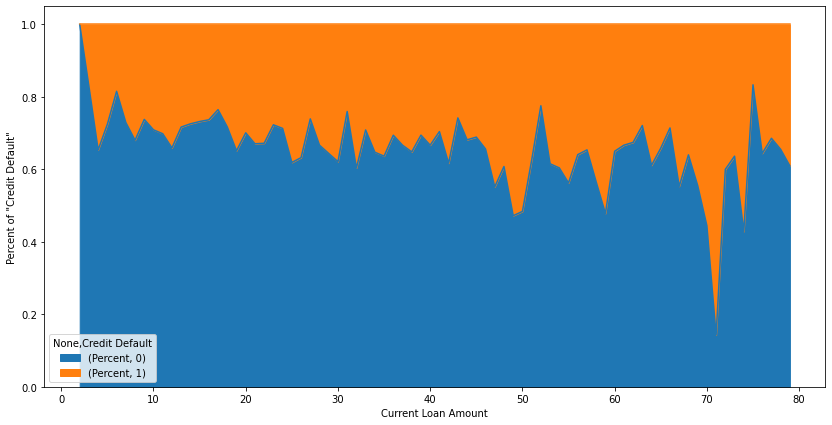

In [43]:
cla_df = cla_lim_train
cla_df['Current Loan Amount'] = cla_df['Current Loan Amount'] // 10000 + 1

cla_df_tv = Percentage_Distribution_Of_Values(cla_df, 'Current Loan Amount', 'Credit Default')
cla_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(14, 7))

In [44]:
train_df.loc[train_df['Current Loan Amount'] > 1000000].tail(20)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7292,Home Mortgage,1414892.0,8 years,0.0,28.0,15.200000,1240426.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,325660.0,33839.0,738.0,0
7306,Rent,1424012.0,< 1 year,0.0,6.0,15.500000,98846.0,0.0,19.0,0.0,other,Short Term,100000000.0,29279.0,1685.0,734.0,0
7314,Rent,325299.0,NaN,0.0,17.0,17.700001,458568.0,0.0,29.0,0.0,debt consolidation,Short Term,100000000.0,176643.0,6018.0,729.0,0
7319,Home Mortgage,901132.0,4 years,0.0,14.0,14.000000,299838.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,227620.0,24180.0,733.0,0
7320,Own Home,1277275.0,10+ years,0.0,6.0,19.299999,221760.0,0.0,36.0,0.0,home improvements,Long Term,100000000.0,69521.0,8749.0,694.0,0
7327,Rent,575814.0,10+ years,0.0,8.0,15.600000,253264.0,0.0,34.0,0.0,medical bills,Short Term,100000000.0,194655.0,12092.0,679.0,0
7330,Rent,932995.0,7 years,0.0,12.0,12.800000,308858.0,0.0,38.0,0.0,debt consolidation,Short Term,100000000.0,161918.0,12984.0,726.0,0
7334,Own Home,816506.0,10+ years,0.0,14.0,19.600000,2277638.0,0.0,14.0,0.0,buy a car,Long Term,100000000.0,1327777.0,21638.0,717.0,0
7335,Home Mortgage,951805.0,2 years,0.0,16.0,10.100000,972752.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,261269.0,16339.0,732.0,0
7339,Own Home,244416.0,1 year,0.0,4.0,5.800000,58762.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,29887.0,3809.0,638.0,0


In [45]:
train_df.loc[train_df['Current Loan Amount'] > 9000000, 'Current Loan Amount'] = train_df['Current Loan Amount'] / 10
train_df.loc[(train_df['Current Loan Amount'] > 1000000) & (train_df['Annual Income'] < 1000000), 'Current Loan Amount'] = train_df['Current Loan Amount'] / 10 


test_df.loc[test_df['Current Loan Amount'] > 9000000, 'Current Loan Amount'] = test_df['Current Loan Amount'] / 10
test_df.loc[(test_df['Current Loan Amount'] > 1000000) & (test_df['Annual Income'] < 1000000), 'Current Loan Amount'] = test_df['Current Loan Amount'] / 10

In [46]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7500.00,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366390e+06,0.025067,11.130934,18.317446,9.451526e+05,0.169067,34.692600,0.117152,1063571.25,2.898332e+05,18314.453125,1151.087524,0.281733
std,8.453384e+05,0.199109,4.908937,7.041938,1.602614e+07,0.492312,21.688801,0.347197,2553017.00,3.178713e+05,11926.758789,1604.447510,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.00,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,180169.00,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,309573.00,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.799999,7.935015e+05,0.000000,50.000000,0.000000,519882.00,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,3.000000,43.000000,57.700001,1.304726e+09,6.000000,118.000000,4.000000,10000000.00,6.506797e+06,136679.000000,7510.000000,1.000000


Кредит 100 000 000 был выдан 870 людям, возможно, это выбросы, так как зп у этих людей не высокий. 

Можно уменьшить кредит в 10 раз от первоначальной суммы

75 перцентиль Current Loan Amount 519882.0 

Далее для всех кредитов более 1 млн при годовой зп менее 1 млн уменьшим кредит также в 10 раз- это выбросы

Средний процент просрочки составляет около 30%

#### Показатель 'Current Credit Balance'
(текущий кредитный баланс)

Без пропусков в обоих датасетах

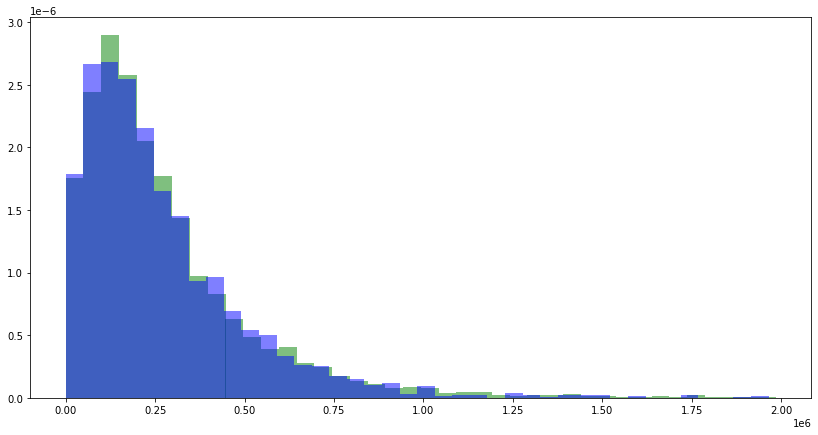

In [47]:
plt.figure(figsize=(14, 7))
ccb_lim_train = train_df.loc[train_df['Current Credit Balance'] < 2000000, ['Current Credit Balance' , 'Credit Default' ]]
ccb_lim_test = test_df.loc[test_df['Current Credit Balance'] < 2000000, ['Current Credit Balance']]

plt.hist(ccb_lim_train['Current Credit Balance'], bins=40, density=True, alpha=0.5, label='train', color='green')
plt.hist(ccb_lim_test['Current Credit Balance'], bins=40, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Percent of "Credit Default"'>

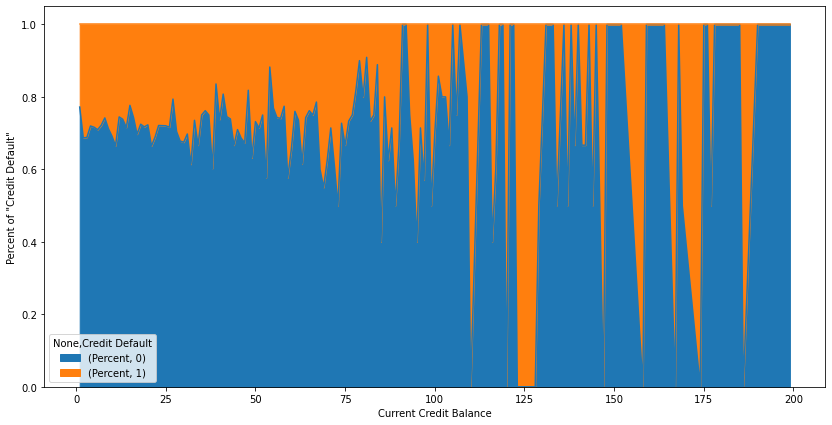

In [48]:
ccb_df = ccb_lim_train
ccb_df['Current Credit Balance'] = ccb_df['Current Credit Balance'] // 10000 + 1

ccb_df_tv = Percentage_Distribution_Of_Values(ccb_df, 'Current Credit Balance', 'Credit Default')
ccb_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(14, 7))

In [49]:
test_df.loc[test_df['Current Credit Balance'] > 2000000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
176,Home Mortgage,3725900.0,5 years,0.0,22.0,27.500000,5926250.0,0.0,0.0,0.0,debt consolidation,Long Term,754996.0,3209062.0,69550.0,686.0
222,Home Mortgage,2807535.0,10+ years,0.0,12.0,19.299999,15568542.0,0.0,NaN,0.0,buy house,Short Term,10000000.0,3240374.0,27607.0,750.0
228,Home Mortgage,3356255.0,10+ years,0.0,20.0,17.200001,54484384.0,0.0,NaN,0.0,home improvements,Long Term,777238.0,5176018.0,42792.0,695.0
253,Home Mortgage,3863840.0,10+ years,0.0,20.0,28.600000,6381078.0,0.0,5.0,0.0,debt consolidation,Long Term,10000000.0,4304051.0,66973.0,727.0
285,Home Mortgage,5840220.0,10+ years,0.0,20.0,27.000000,6425034.0,0.0,62.0,0.0,debt consolidation,Short Term,473374.0,4489054.0,84683.0,745.0
435,Home Mortgage,2431772.0,2 years,0.0,11.0,18.400000,6087290.0,0.0,NaN,0.0,other,Short Term,94600.0,3659001.0,69913.0,705.0
584,Home Mortgage,1313413.0,7 years,0.0,11.0,21.500000,19185386.0,0.0,40.0,0.0,other,Long Term,495660.0,2236832.0,6906.0,743.0
604,Home Mortgage,5979623.0,8 years,0.0,12.0,28.000000,2450910.0,0.0,30.0,0.0,debt consolidation,Long Term,571494.0,2093401.0,62786.0,693.0
963,Rent,3238721.0,2 years,0.0,12.0,18.700001,2673462.0,0.0,NaN,0.0,debt consolidation,Short Term,370590.0,2200390.0,92574.0,726.0
1256,Home Mortgage,2433900.0,6 years,0.0,17.0,28.100000,2589576.0,0.0,NaN,0.0,debt consolidation,Long Term,789096.0,2191726.0,39956.0,681.0


In [50]:
train_df.loc[(train_df['Current Credit Balance'] > 2000000) & (train_df['Current Credit Balance'] > train_df['Current Loan Amount']), 'Current Credit Balance'] = train_df['Current Credit Balance'] / 10
test_df.loc[(test_df['Current Credit Balance'] > 2000000) & (test_df['Current Credit Balance'] > test_df['Current Loan Amount']), 'Current Credit Balance'] = test_df['Current Credit Balance'] / 10


In [51]:
train_df.loc[train_df['Current Credit Balance'] > 1000000].tail(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7114,Home Mortgage,2888760.0,3 years,0.0,13.0,27.000000,1611324.0,0.0,38.0,0.0,debt consolidation,Short Term,474760.0,1359602.0,47905.0,693.0,0
7145,Home Mortgage,1804487.0,10+ years,0.0,16.0,14.200000,1825714.0,0.0,NaN,0.0,debt consolidation,Short Term,603130.0,1100575.0,26616.0,731.0,1
7178,Home Mortgage,2513472.0,3 years,0.0,17.0,18.600000,1975688.0,0.0,NaN,0.0,debt consolidation,Short Term,10000000.0,1414512.0,59276.0,745.0,0
7251,Home Mortgage,NaN,10+ years,0.0,8.0,51.000000,1769900.0,0.0,27.0,0.0,debt consolidation,Long Term,439252.0,1369577.0,22516.0,NaN,1
7334,Own Home,816506.0,10+ years,0.0,14.0,19.600000,2277638.0,0.0,14.0,0.0,buy a car,Long Term,1000000.0,1327777.0,21638.0,717.0,0
7354,Home Mortgage,1334066.0,7 years,0.0,14.0,19.600000,1430968.0,0.0,NaN,0.0,debt consolidation,Long Term,623788.0,1160444.0,31573.0,6640.0,1
7377,Home Mortgage,1844292.0,10+ years,0.0,13.0,19.700001,5784482.0,0.0,6.0,0.0,debt consolidation,Long Term,265078.0,1673558.0,12833.0,698.0,0
7404,Home Mortgage,NaN,10+ years,0.0,21.0,16.200001,2468026.0,0.0,NaN,0.0,debt consolidation,Short Term,400004.0,1157385.0,42990.0,NaN,1
7445,Home Mortgage,1564384.0,6 years,0.0,21.0,17.299999,1545016.0,0.0,NaN,0.0,other,Long Term,10000000.0,1043442.0,32461.0,728.0,0
7459,Home Mortgage,NaN,9 years,2.0,21.0,12.100000,1547854.0,3.0,37.0,0.0,debt consolidation,Short Term,458854.0,1149614.0,85030.0,NaN,0


Текущая сумма кредита не может быть меньше текущего кредитного баланса, поэтому нужно это исправить

Средний процент просрочки составляет около 30%

In [52]:
train_df.loc[train_df['Current Credit Balance'] > train_df['Current Loan Amount'], 'Current Credit Balance'] = train_df['Current Credit Balance'] / 10
test_df.loc[test_df['Current Credit Balance'] > test_df['Current Loan Amount'], 'Current Credit Balance'] = test_df['Current Credit Balance'] / 10


#### Показатель 'Monthly Debt'
(ежемесячный долг)

Без пропусков в обоих датасетах

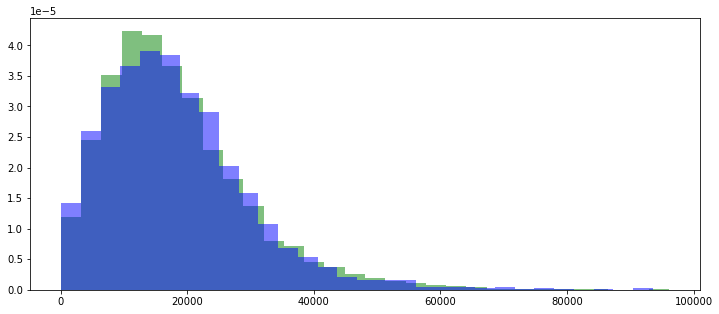

In [53]:
plt.figure(figsize=(12, 5))
md_lim_train = train_df.loc[train_df['Monthly Debt'] < 100000, ['Monthly Debt' , 'Credit Default' ]]
md_lim_test = test_df.loc[test_df['Monthly Debt'] < 100000, ['Monthly Debt']]

plt.hist(md_lim_train['Monthly Debt'], bins=30, density=True, alpha=0.5, label='train', color='green')
plt.hist(md_lim_test['Monthly Debt'], bins=30, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Monthly Debt', ylabel='Percent of "Credit Default"'>

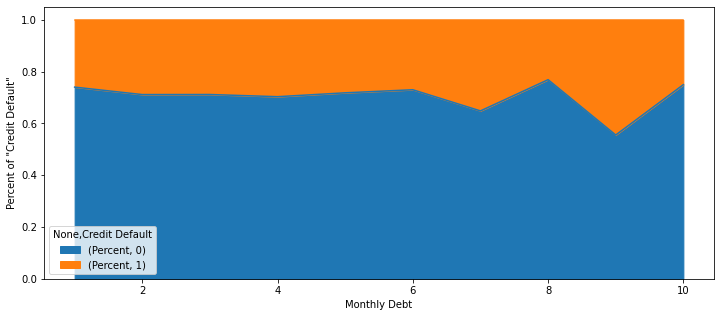

In [54]:
md_df = md_lim_train
md_df['Monthly Debt'] = md_df['Monthly Debt'] // 10000 + 1

md_df_tv = Percentage_Distribution_Of_Values(md_df, 'Monthly Debt', 'Credit Default')
md_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12, 5))

Основные значения в промежутке 0 - 70.000

Среди основных значений просрочек по кредиту около 30%

#### Показатель 'Annual Income'
(годовой доход)

Показатель заполнен не полностью. С пропусками в обоих датасетах.

Train:

1   Annual Income                 5943 non-null   float64

Test:

1   Annual Income                 1987 non-null   float64

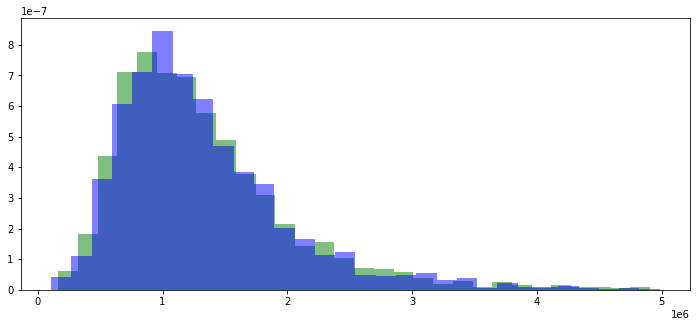

In [55]:
plt.figure(figsize=(12, 5))
ai_lim_train = train_df.loc[train_df['Annual Income'] < 5000000, ['Annual Income' , 'Credit Default' ]]
ai_lim_test = test_df.loc[test_df['Annual Income'] < 5000000, ['Annual Income']]

plt.hist(ai_lim_train['Annual Income'], bins=30, density=True, alpha=0.5, label='train', color='green')
plt.hist(ai_lim_test['Annual Income'], bins=30, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Annual Income', ylabel='Percent of "Credit Default"'>

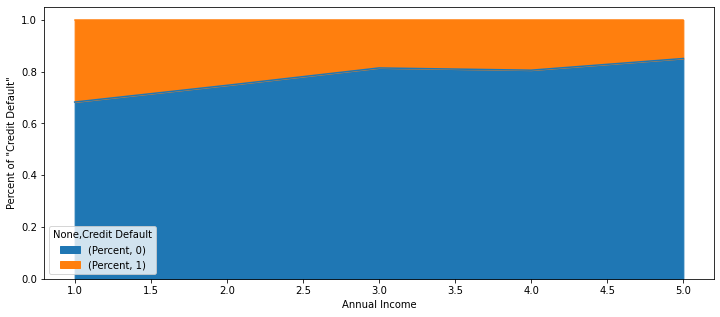

In [56]:
ai_df = ai_lim_train
ai_df['Annual Income'] = ai_df['Annual Income'] // 1000000 + 1

ai_df_tv = Percentage_Distribution_Of_Values(ai_df, 'Annual Income', 'Credit Default')
ai_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12, 5))

Основные значения в промежутке 0 - 3.500.000

Среди основных значений просрочек по кредиту около 25%, причем прослеживается зависимость: при увеличении дохода уменьшается процент просрочек

In [57]:
ai_lim_null_train = train_df.loc[train_df['Annual Income'].isnull(), ['Annual Income', 'Credit Default']]

ai_lim_null_train['Annual Income'] = 0
ai_lim_null_train.value_counts()

Annual Income  Credit Default
0              0                 1028
               1                  529
dtype: int64

In [58]:
529/(1028+529)

0.3397559409120103

Процент просрочки в датасетах с NaN и с заполненными значениями не сильно отличается. Следовательно, пропуски можно заполнить медианой

In [59]:
train_df.loc[train_df['Annual Income'].isnull(), ['Annual Income']] = train_df['Annual Income'].median()
test_df.loc[test_df['Annual Income'].isnull(), ['Annual Income']] = test_df['Annual Income'].median()

#### Показатель 'Years in current job'
(количество лет на текущем месте работы)

Показатель заполнен не полностью. С пропусками в обоих датасетах.

Train: 

2   Years in current job          7129 non-null   object 

Test:

2   Years in current job          2414 non-null   object

In [60]:
ycj_df = pd.concat([train_df['Years in current job'].value_counts(), test_df['Years in current job'].value_counts()], axis=1).reset_index()
ycj_df.columns = ['value', 'train', 'test']
ycj_df.append(['', train_df['Years in current job'].value_counts().dtype, test_df['Years in current job'].value_counts().dtype],['value', 'train', 'test'])
ycj_df

,value,train,test
0,1 year,504,153
1,10+ years,2332,810
2,2 years,705,212
3,3 years,620,228
4,4 years,469,152
5,5 years,516,169
6,6 years,426,137
7,7 years,396,140
8,8 years,339,107
9,9 years,259,99


In [61]:
ycj_df_tv = Percentage_Distribution_Of_Values(train_df, 'Years in current job', 'Credit Default')
ycj_df_tv

Percent           Quantity
Credit Default               0         1         
Years in current job                             
1 year                0.718254  0.281746      504
10+ years             0.723842  0.276158     2332
2 years               0.726241  0.273759      705
3 years               0.725806  0.274194      620
4 years               0.720682  0.279318      469
5 years               0.718992  0.281008      516
6 years               0.708920  0.291080      426
7 years               0.719697  0.280303      396
8 years               0.728614  0.271386      339
9 years               0.749035  0.250965      259
< 1 year              0.717584  0.282416      563

In [62]:
ycj_df_null_train = train_df.loc[train_df['Years in current job'].isnull(), ['Years in current job', 'Credit Default']]
ycj_df_null_train['Years in current job'] = 0

ycj_df_null_train.value_counts()

# ycj_df_tv = Percentage_Distribution_Of_Values(train_df, 'Years in current job', 'Credit Default')
# ycj_df_tv

Years in current job  Credit Default
0                     0                 234
                      1                 137
dtype: int64

In [63]:
137 / (234+ 137)

0.3692722371967655

Раз такой высокий процент просрочки, возможно, это безработные люди. Прировняем пустые данные к менее 1 года 

In [64]:
train_df.loc[train_df['Years in current job'].isnull(), ['Years in current job']] = '< 1 year'
test_df.loc[test_df['Years in current job'].isnull(), ['Years in current job']] = '< 1 year'

#### Показатель 'Months since last delinquent'
(количество месяцев с последней просрочки платежа)

Показатель заполнен не полностью. С пропусками в обоих датасетах.

Train:

8   Months since last delinquent  3419

Test:

8   Months since last delinquent  1142

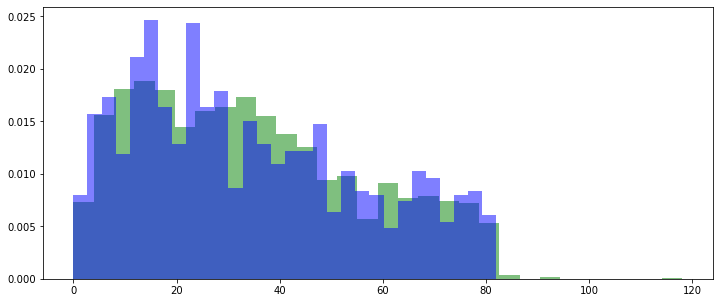

In [65]:
plt.figure(figsize=(12, 5))
msld_train_df = train_df[['Months since last delinquent' , 'Credit Default']]
msld_test_df = test_df[['Months since last delinquent']]

plt.hist(msld_train_df['Months since last delinquent'], bins=30, density=True, alpha=0.5, label='train', color='green')
plt.hist(msld_test_df['Months since last delinquent'], bins=30, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Percent of "Credit Default"'>

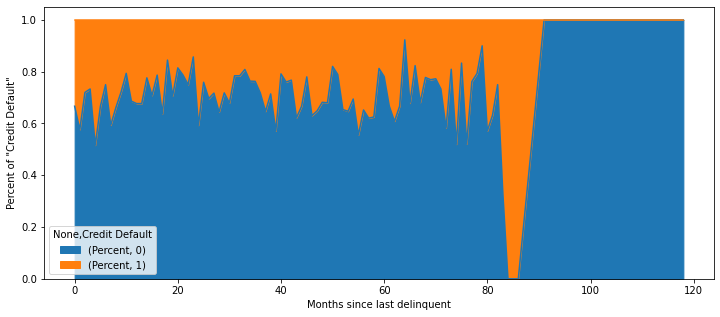

In [66]:
msld_df = msld_train_df

msld_df_tv = Percentage_Distribution_Of_Values(msld_df, 'Months since last delinquent', 'Credit Default')
msld_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12, 5))

In [67]:
msld_null_train = train_df.loc[train_df['Months since last delinquent'].isnull(), ['Months since last delinquent', 'Credit Default']]

msld_null_train['Months since last delinquent'] = 0
msld_null_train.value_counts()

Months since last delinquent  Credit Default
0                             0                 2951
                              1                 1130
dtype: int64

In [68]:
1130 / (2951 + 1130)

0.27689291840235236

Процент просрочки не сильно отличается у NaN и с другими значениями. 

Скорее всего NaN связано с отсутствием просроки по кредиту, макс значение 118, тогда установим для NaN 120

In [69]:
train_df.loc[train_df['Months since last delinquent'].isnull(), ['Months since last delinquent']] = 120.0
test_df.loc[test_df['Months since last delinquent'].isnull(), ['Months since last delinquent']] = 120.0

#### Показатель 'Bankruptcies'
(банкротства)

Показатель заполнен не полностью. С пропусками в обоих датасетах.

Train:

8   Months since last delinquent  7486

Test:

8   Months since last delinquent  2497

In [70]:
b_df = pd.concat([train_df['Bankruptcies'].value_counts(), test_df['Bankruptcies'].value_counts()], axis=1).reset_index()
b_df.columns = ['value', 'train', 'test']
b_df.append(['', train_df['Bankruptcies'].value_counts().dtype, test_df['Bankruptcies'].value_counts().dtype],['value', 'train', 'test'])
b_df

,value,train,test
0,0.0,6660.0,2252
1,1.0,786.0,234
2,2.0,31.0,5
3,3.0,7.0,3
4,4.0,2.0,1
5,5.0,NaN,2


In [71]:
b_df_tv = Percentage_Distribution_Of_Values(train_df, 'Bankruptcies', 'Credit Default')
b_df_tv

Percent           Quantity
Credit Default         0         1         
Bankruptcies                               
0.0             0.718018  0.281982     6660
1.0             0.723919  0.276081      786
2.0             0.645161  0.354839       31
3.0             0.714286  0.285714        7
4.0             0.500000  0.500000        2

In [72]:
b_null_train = train_df.loc[train_df['Bankruptcies'].isnull(), ['Bankruptcies', 'Credit Default']]

b_null_train['Bankruptcies'] = 0
b_null_train.value_counts()

Bankruptcies  Credit Default
0             0                 10
              1                  4
dtype: int64

In [73]:
4 / (4 + 10)

0.2857142857142857

Процент просрочки не сильно отличается, NaN заполним медианой

Значения >1 очень нестабильны, можно всех их соединить

In [74]:
train_df.loc[train_df['Bankruptcies'].isnull(), ['Bankruptcies']] = train_df['Bankruptcies'].median()
test_df.loc[test_df['Bankruptcies'].isnull(), ['Bankruptcies']] = test_df['Bankruptcies'].median()

In [75]:
train_df.loc[train_df['Bankruptcies'] > 2, ['Bankruptcies']] = 2.0
test_df.loc[test_df['Bankruptcies'] > 2, ['Bankruptcies']] = 2.0

#### Показатель 'Credit Score'
(кредитный скоринг)

Напомним про значения:

Кредитный скоринг:

выше 790 — «великолепно»

750—790 — средний стандартный уровень

740—750 — «очень хорошо»

720—740 — «хорошо»

700—720 — «плохо»

ниже 700 — «очень плохо»

Показатель заполнен не полностью. С пропусками в обоих датасетах.

Train:

Credit Score  5943

Test:

Credit Score 1987

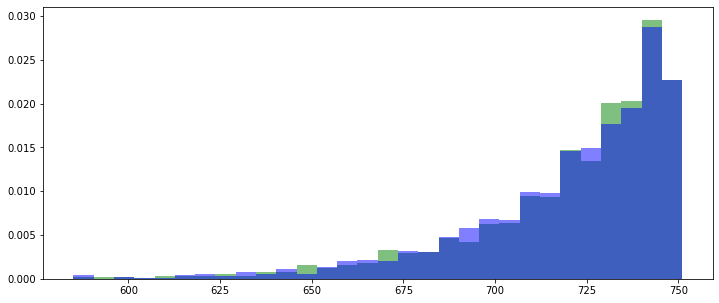

In [76]:
plt.figure(figsize=(12, 5))
sc_lim_train = train_df.loc[train_df['Credit Score'] < 1000, ['Credit Score' , 'Credit Default' ]]
sc_lim_test = test_df.loc[test_df['Credit Score'] < 1000, ['Credit Score']]

plt.hist(sc_lim_train['Credit Score'], bins=30, density=True, alpha=0.5, label='train', color='green')
plt.hist(sc_lim_test['Credit Score'], bins=30, density=True, alpha=0.5, label='test', color='blue')

plt.show()

<AxesSubplot:xlabel='Credit Score', ylabel='Percent of "Credit Default"'>

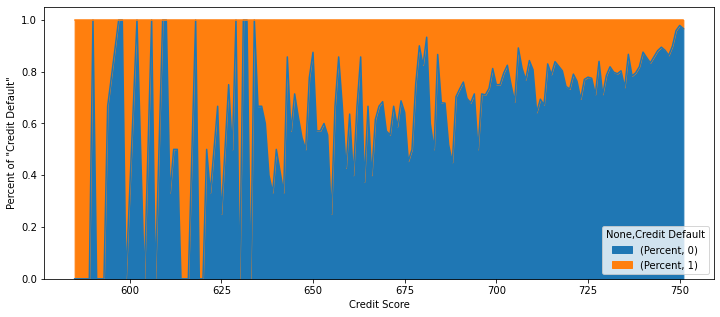

In [77]:
sc_df = sc_lim_train

sc_df_tv = Percentage_Distribution_Of_Values(sc_df, 'Credit Score', 'Credit Default')
sc_df_tv.plot(y=[('Percent', 0),('Percent', 1)], kind='area', ylabel = 'Percent of "Credit Default"', figsize=(12, 5))

In [78]:
train_df.loc[(train_df['Credit Score'] > 800) & (train_df['Credit Score'] < 6000)].info()
test_df.loc[(test_df['Credit Score'] > 800) & (test_df['Credit Score'] < 6000)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                0 non-null      category
 1   Annual Income                 0 non-null      float32 
 2   Years in current job          0 non-null      category
 3   Tax Liens                     0 non-null      float32 
 4   Number of Open Accounts       0 non-null      float32 
 5   Years of Credit History       0 non-null      float32 
 6   Maximum Open Credit           0 non-null      float32 
 7   Number of Credit Problems     0 non-null      float32 
 8   Months since last delinquent  0 non-null      float32 
 9   Bankruptcies                  0 non-null      float32 
 10  Purpose                       0 non-null      category
 11  Term                          0 non-null      category
 12  Current Loan Amount           0 non-null      float32 
 13  Cu

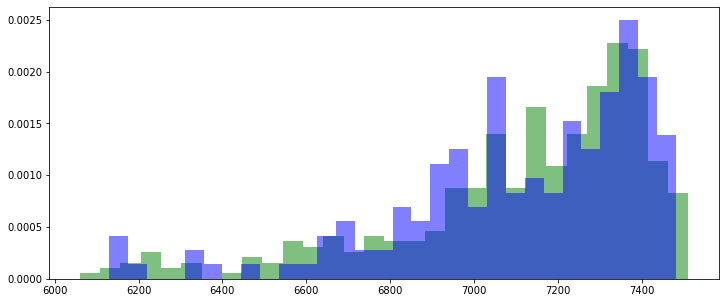

In [79]:
plt.figure(figsize=(12, 5))
sc_lim_max_train = train_df.loc[train_df['Credit Score'] > 6000, ['Credit Score' , 'Credit Default' ]]
sc_lim_max_test = test_df.loc[test_df['Credit Score'] > 6000, ['Credit Score']]

plt.hist(sc_lim_max_train['Credit Score'], bins=30, density=True, alpha=0.5, label='train', color='green')
plt.hist(sc_lim_max_test['Credit Score'], bins=30, density=True, alpha=0.5, label='test', color='blue')

plt.show()

Распределение 600-800 одинаково с 6000-8000, можно их посчитай неточностью при сборки данных, приведем их к общему виду 600-800

In [80]:
train_df.loc[(train_df['Credit Score'] > 6000) & (train_df['Credit Score'] < 8000), 'Credit Score'] = train_df['Credit Score'] / 10
test_df.loc[(test_df['Credit Score'] > 6000) & (test_df['Credit Score'] < 8000), 'Credit Score'] = test_df['Credit Score'] / 10


In [81]:
train_df['Credit Score'].describe()

count    5943.000000
mean      720.086975
std        27.957260
min       585.000000
25%       708.000000
50%       729.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64

In [82]:
test_df['Credit Score'].describe()

count    1987.000000
mean      719.542053
std        27.724298
min       585.000000
25%       706.000000
50%       727.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64

Теперь данные кажутся более правдоподобными

Посмотрим NaN и прировняем значения к медиане

In [83]:
b_null_train = train_df.loc[train_df['Credit Score'].isnull(), ['Credit Score', 'Credit Default']]

b_null_train['Credit Score'] = 0
b_null_train.value_counts()

Credit Score  Credit Default
0             0                 1028
              1                  529
dtype: int64

In [84]:
529 / (1028 + 529)

0.3397559409120103

In [85]:
train_df.loc[train_df['Credit Score'].isnull(), ['Credit Score']] = train_df['Credit Score'].median()
test_df.loc[test_df['Credit Score'].isnull(), ['Credit Score']] = test_df['Credit Score'].median()

#### Обзор матрицы корреляций

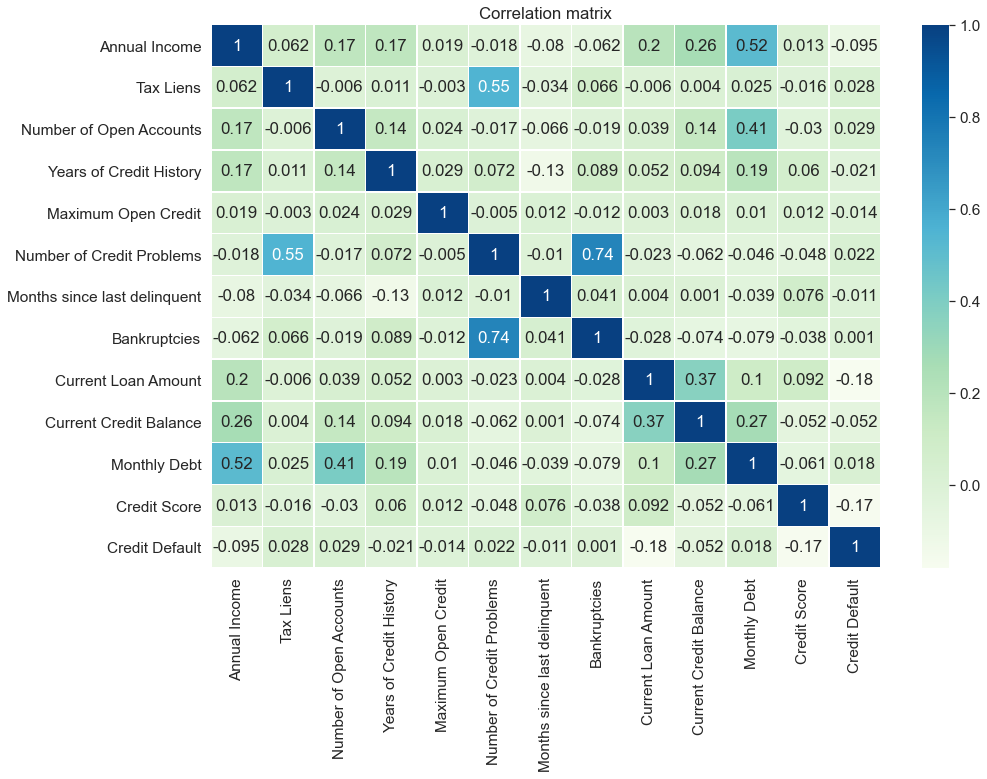

In [86]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

sns.heatmap(train_df.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Единственная зависимость, которая более менее прослеживается- Количество проблем с кредитом и Банкротства, также зависимость с налоговыми обременениями

### Выделение переменной и групп признаков

In [87]:
TARGET_NAME = 'Credit Default'

BASE_FEATURE_NAMES = train_df.columns.drop(TARGET_NAME).tolist()

NUM_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
                     'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 
                     'Current Credit Balance', 'Monthly Debt', 'Credit Score']

CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

In [88]:
NEW_FEATURE_NAMES = train_df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

In [89]:
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + NEW_FEATURE_NAMES

### Разбиение на train и test

In [90]:
X = train_df[SELECTED_FEATURE_NAMES]
y = train_df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

### Балансировка целевой переменной

In [91]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [92]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [93]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Сохранение обучающего и тестового датасетов

In [94]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

### Построение и оценка базовых моделей

In [95]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

**Логистическая регрессия**

In [96]:
# model_lr = LogisticRegression()
# model_lr.fit(X_train, y_train)

# y_train_pred = model_lr.predict(X_train)
# y_test_pred = model_lr.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

**k ближайших соседей**

In [97]:
# model_knn = KNeighborsClassifier()
# model_knn.fit(X_train, y_train)

# y_train_pred = model_knn.predict(X_train)
# y_test_pred = model_knn.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

### Бустинговые алгоритмы

*XGBoost*

In [98]:
# model_xgb = xgb.XGBClassifier(random_state=21)
# model_xgb.fit(X_train, y_train)

# y_train_pred = model_xgb.predict(X_train)
# y_test_pred = model_xgb.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

*LightGBM*

In [99]:
# model_lgbm = lgbm.LGBMClassifier(random_state=21)
# model_lgbm.fit(X_train, y_train)

# y_train_pred = model_lgbm.predict(X_train)
# y_test_pred = model_lgbm.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

*CatBoost*

In [100]:
# model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
# model_catb.fit(X_train, y_train)

# y_train_pred = model_catb.predict(X_train)
# y_test_pred = model_catb.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

Проверка различных методов и настройка параметров показала

**Логистическая регрессия**
        f1-score для главного класса (1 - просрочка по кредиту)
Train    0.41
Test     0.32

**k ближайших соседей**
        f1-score для главного класса (1 - просрочка по кредиту)
Train    0.71
Test     0.39

**XGBoost**
        f1-score для главного класса (1 - просрочка по кредиту)
Train    0.97
Test     0.39

**LightGBM**
        f1-score для главного класса (1 - просрочка по кредиту)
Train    0.91
Test     0.42

**CatBoost**
        f1-score для главного класса (1 - просрочка по кредиту)
Train    0.86
Test     0.43

В результате был выбран метод **CatBoost**

### Выбор лучшей модели и подбор гиперпараметров

In [101]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

**Подбор гиперпараметров**

In [102]:
params = {'n_estimators':[50, 100, 200, 300, 400, 500, 600, 700, 1000, 1200, 1500],
          'max_depth':[1, 2 ,3 , 5, 7],
         'l2_leaf_reg': [3, 5, 7, 9, 10, 12, 15]}

In [103]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [104]:
# %%time

# rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
# rs.fit(X, y)

In [105]:
# rs.best_params_

In [106]:
# rs.best_score_

{'n_estimators': 700, 'max_depth': 3, 'l2_leaf_reg': 9}

0.5090397206232325

In [108]:
%%time

best_model = catb.CatBoostClassifier(n_estimators=700, 
                                      max_depth=3,
                                      l2_leaf_reg=9,
                                      silent=True, 
                                      random_state=21)

best_model.fit(train_df[SELECTED_FEATURE_NAMES], train_df[TARGET_NAME])

test_df[TARGET_NAME] = best_model.predict(test_df[SELECTED_FEATURE_NAMES])

CPU times: user 2.92 s, sys: 558 ms, total: 3.48 s
Wall time: 1.91 s


In [110]:
test_df.insert(0, 'Id', test_df.index)
test_df[['Id',TARGET_NAME]].to_csv('OShaikova_predictions.csv', index=None)